## Holiday Package Prediction 

#### Data Cleaning 

In [1]:
## importing necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
## Loading dataset 
df = pd.read_csv("Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
## checking for null values 
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

##### Our Data-set contains Null Values , So firstly we need to fix this null values 

In [5]:
## checking for duplicate values in columns 
df["Gender"].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [6]:
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
## fixing Fe male with Female 
df["Gender"] = df["Gender"].str.replace("Fe Male","Female")

In [8]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
## Since Single == Unmarried 
df["MaritalStatus"] = df["MaritalStatus"].str.replace("Single","Unmarried")

In [10]:
print(df["MaritalStatus"].value_counts())
print(df["Gender"].value_counts())

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
Gender
Male      2916
Female    1972
Name: count, dtype: int64


In [11]:
## checking missing or nan values in each column 
feature_with_nan = [features for features in df.columns if df[features].isnull().sum() >= 1 ]
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5))  ## Percentage of missing values  

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [12]:
df[feature_with_nan].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [13]:
# ## Handing Null values with mean , median and mode 
# ## using median for numerical features 
# ## using mode for categorical features 

# ## Age - median 
# df["Age"] = df["Age"].fillna(df["Age"].median())

# ## Type of Contact - mode 
# df["TypeofContact"] = df["TypeofContact"].fillna(df["TypeofContact"].mode()[0])

# ## Duration of Pitch - median 
# df["DurationOfPitch"] = df["DurationOfPitch"].fillna(df["DurationOfPitch"].median())

# ## NumberOfFollowups - mode 
# df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# ## PreferredPropertyStar - mode
# df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# ## NumberOfTrips - median
# df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# ## NumberOfChildrenVisiting - median
# df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# ## MonthlyIncome - median
# df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [14]:
df[feature_with_nan].dtypes

Age                         float64
TypeofContact                object
DurationOfPitch             float64
NumberOfFollowups           float64
PreferredPropertyStar       float64
NumberOfTrips               float64
NumberOfChildrenVisiting    float64
MonthlyIncome               float64
dtype: object

In [15]:
## Handing Null values with mean , median and mode 
## using median for numerical features 
## using mode for categorical features

In [16]:
## optimized approach
for feature in df[feature_with_nan] :
    if df[feature].dtype == "O":
        df[feature].fillna(df[feature].mode()[0],inplace = True)
    elif df[feature].name == "NumberOfFollowups" or df[feature].name == "PreferredPropertyStar":
        df[feature].fillna(df[feature].mode()[0],inplace = True)
    else :
         df[feature].fillna(df[feature].median(),inplace = True)

In [17]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [18]:
## No use of Customer ID Column , that's why we are dropping it 
df.drop("CustomerID", axis = 1, inplace = True)

##### All the missing values are removed and our dataset is now completely cleaned 

In [19]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [20]:
## We can combine 2 columns 
df["Total_Visiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
## finding all the numerical and categorical features in the dataset 
numerical_features = [features for features in df.columns if df[features].dtype != "O"]
categorical_features = [features for features in df.columns if df[features].dtype == "O"]
print("Numerical features = ",len(numerical_features))
print("Categorical features = ",len(categorical_features))

Numerical features =  12
Categorical features =  6


In [23]:
## Independent and Dependent features 
X = df.drop(["ProdTaken"],axis=1)  ## Input Features 
y = df["ProdTaken"] ## Output Feature

In [24]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [ ]:
## Applying train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
## Applying Feature Engineering using Column Transformer 
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns 

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

## Column Transformer is used for combining multiple Transforming Techniques 

numeric_transformer = StandardScaler() ## Scale down the data 
oh_transformer = OneHotEncoder(drop="first") ## conversion of categorical features into numerical features 
## (drop="first") , suppose there are n columns , n-1 are taken , one column is not important 

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),("StandardScaler",numeric_transformer,num_features)
    ]
)

In [ ]:
## applying Standard Scaler to train and test data (only input features)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

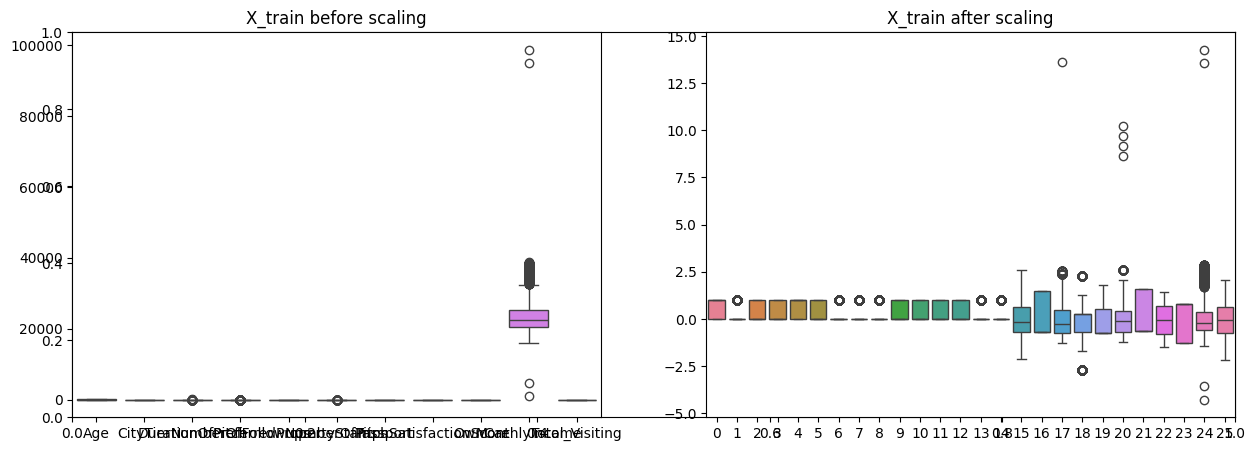

In [ ]:
## Box Plots for undersatnding effect of Standard Scaler 
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
plt.show()

In [ ]:
print(pd.DataFrame(X_train_scaled))

       0    1    2    3    4    5    6    7    8    9   ...        16  \
0     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   
1     1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ... -0.721400   
2     1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   
3     1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  ... -0.721400   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
3905  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   
3906  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.455047   
3907  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.455047   
3908  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.455047   
3909  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   

            17        18        19        20        21        22        23  \
0    -1.020350  1.284279 -0.725271 -0.127737 

In [ ]:
print(pd.DataFrame(X_test_scaled))

      0    1    2    3    4    5    6    7    8    9   ...        16  \
0    0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  1.455047   
1    1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  0.366823   
2    1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  1.455047   
3    1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ... -0.721400   
4    1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.455047   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
973  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ... -0.721400   
974  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ... -0.721400   
975  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ... -0.721400   
976  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   
977  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -0.721400   

           17        18        19        20        21        22        23  \
0   -0.287333  1.284279 -0.725271 -1.220627 -0.632399 -0.7

## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,\
precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [ ]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Logistic Regression" : LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled,y_train) ## Training the model 

    ## Making Predictions 
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    ## Training set Performance 
    model_train_accuracy = accuracy_score(y_train,y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) # Calculate Roc

     # Test set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) # Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training dataset')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('************************************************') 

    print('Model performance for Test dataset')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('************************************************') 
    print("\n")


Random Forest
Model performance for Training dataset
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
************************************************
Model performance for Test dataset
- Accuracy: 0.9325
- F1 score: 0.9275
- Precision: 0.9771
- Recall: 0.6702
- Roc Auc Score: 0.8332
************************************************


Decision Tree
Model performance for Training dataset
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
************************************************
Model performance for Test dataset
- Accuracy: 0.9223
- F1 score: 0.9215
- Precision: 0.8177
- Recall: 0.7749
- Roc Auc Score: 0.8665
************************************************


Logistic Regression
Model performance for Training dataset
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
************************************************
Model performance for

##### Random Forest Classifier is giving the highest accuracy

#### Hyper-parameter tuning the Random Forest model 

In [ ]:
params = {
    "max_depth" : [5,8,15,20,25,None],
    "max_features" : [5,6,7,"auto",8],
    "min_samples_split" : [2,8,15,20,25],
    "n_estimators" : [100,200,500,800,1000] 
}

In [ ]:
randomcv_models = [
    ("Random Forest",RandomForestClassifier(),params)
]

In [ ]:
randomcv_models

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 20, 25, None],
   'max_features': [5, 6, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20, 25],
   'n_estimators': [100, 200, 500, 800, 1000]})]

In [ ]:
## Applying Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

model_params = {} ## for saving best params 

for name , model , params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train_scaled,y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"Best params for {model_name} ")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params for Random Forest 
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}


In [ ]:
## Randomized Search CV is more faster as compared to Grid Search CV 

In [ ]:
## Best params for Random Forest  : {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}

In [ ]:
## Again Training the model with best params (after hyperparameter tuning)
models = {
    "Random Forest" : RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=202),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled,y_train) ## Training the model 

    ## Making Predictions 
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    ## Training set Performance 
    model_train_accuracy = accuracy_score(y_train,y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) # Calculate Roc

     # Test set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) # Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training dataset')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('************************************************') 

    print('Model performance for Test dataset')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Random Forest
Model performance for Training dataset
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
************************************************
Model performance for Test dataset
- Accuracy: 0.9376
- F1 score: 0.9340
- Precision: 0.9577
- Recall: 0.7120
- Roc Auc Score: 0.8522


##### With best params the model accuracy has also increased 